# Conversion to Sloan system

In [1]:
import pickle
conts = pickle.load(open('Magao-X-contrasts.pkl','rb')) 
conts
gCont,rCont,iCont,zCont = conts['gCont'][0],conts['rCont'][0],conts['iCont'][0],conts['zCont'][0]

In [2]:
# HIP 67506 A mag in Sloan system:
#SDSSgmag,SDSSrmag,SDSSimag,SDSSzmag = 10.957,10.680,10.533,10.511 #from I/353/gsc242, 2008AJ....136..735L
SDSSgmag,SDSSrmag,SDSSimag,SDSSzmag = 11.036,10.659,10.556,10.506 # J/ApJ/867/105/refcat2, 2018ApJ...867..105T
#SDSSgmag,SDSSrmag,SDSSimag,SDSSzmag = 11.06,10.61,10.46,10.42# J/PASP/120/1128/catalog, 2008PASP..120.1128O


# This is magnitude of A+C, need to disambiguate

## Get color conversions using A as standard:

<IPython.core.display.Javascript object>


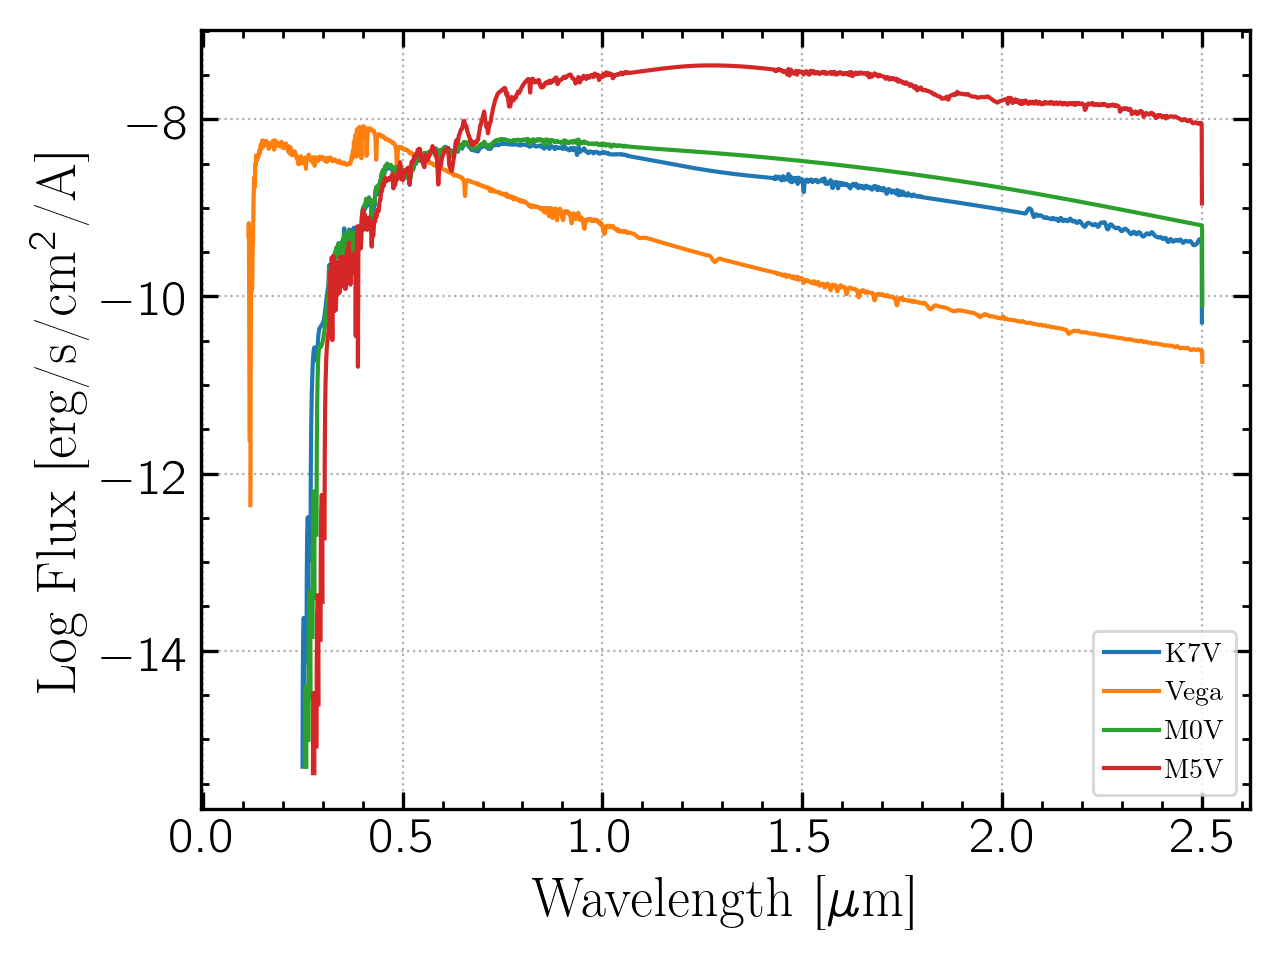

In [3]:
import pickle
pickles = pickle.load(open('/Users/loganpearce/Dropbox/Uarizona/research/model_spectra/pickle_models.pkl','rb'))
spt = [key for key in pickles.keys()]

vega = pickles['A0V']
M0V = pickles['M0V']

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.plot(pickles['K7V']['wavelength']*u.AA.to(u.um),np.log10(pickles['K7V']['flux']),label='K7V')
plt.plot(vega['wavelength']*u.AA.to(u.um),np.log10(vega['flux']),label='Vega')
plt.plot(pickles['M0V']['wavelength']*u.AA.to(u.um),np.log10(pickles['M0V']['flux']),label='M0V')
plt.plot(pickles['M5V']['wavelength']*u.AA.to(u.um),np.log10(pickles['M5V']['flux']),label='M5V')
plt.xlabel('Wavelength [$\mu$m]')
plt.ylabel(r'Log Flux [erg/s/cm$^2$/A]')
plt.grid(ls=':')
plt.legend()
plt.tight_layout()

# Open MagAO-X and SDSS filter curves:

<IPython.core.display.Javascript object>


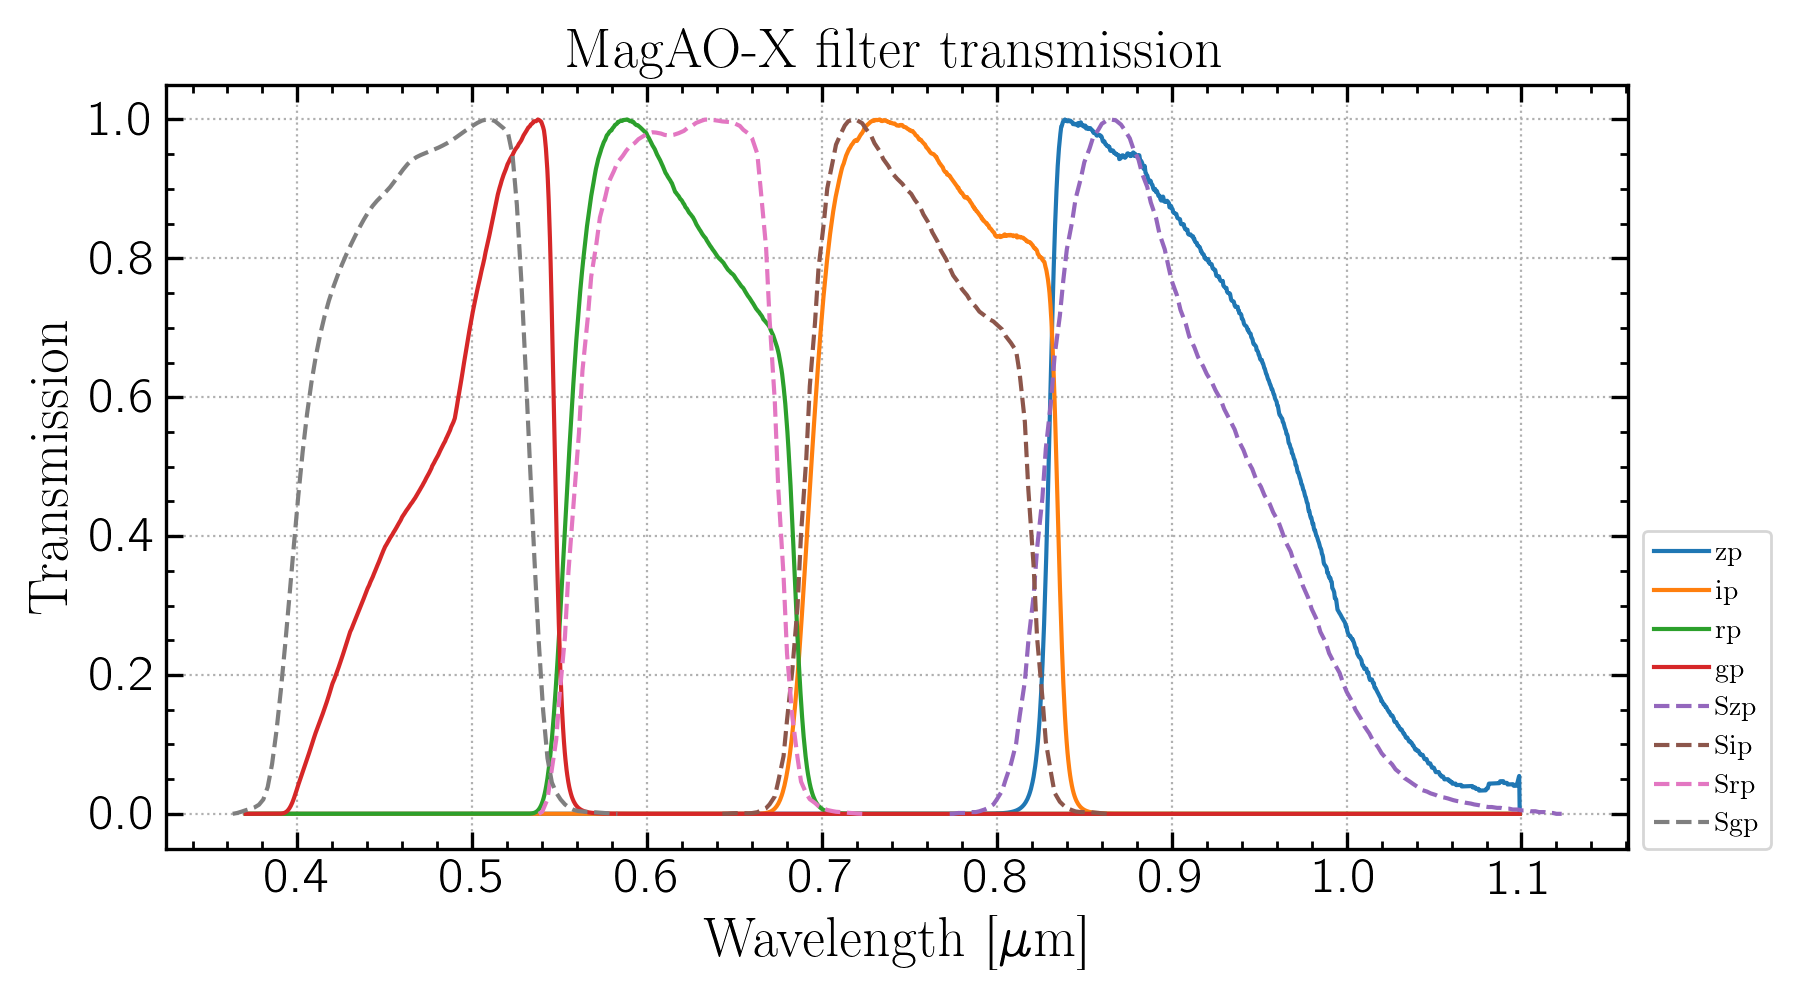

In [4]:
# Get MagAOX filter curves:
directory = '/Users/loganpearce/Dropbox/Uarizona/research/filter_curves/'
# Use curves with atmosphere?
withatm = False

if withatm:
    file = 'magaox_sci1-zp_bs-65-35_scibs-5050_atm.dat'
else:
    file = 'magaox_sci1-zp_bs-65-35_scibs-5050.dat'
zfilter = pd.read_table(directory+file, comment='#', 
                  names=['wavelength [m]','transmission'], delim_whitespace=True)
zfilter['normalized transmission'] = zfilter['transmission']/np.max(zfilter['transmission'])

if withatm:
    file = 'magaox_sci2-ip_bs-65-35_scibs-5050_atm.dat'
else:
    file = 'magaox_sci2-ip_bs-65-35_scibs-5050.dat'
ifilter = pd.read_table(directory+file, comment='#', 
                  names=['wavelength [m]','transmission'], delim_whitespace=True)
ifilter['normalized transmission'] = ifilter['transmission']/np.max(ifilter['transmission'])

if withatm:
    file = 'magaox_sci1-rp_bs-65-35_scibs-5050_atm.dat'
else:
    file = 'magaox_sci1-rp_bs-65-35_scibs-5050.dat'
rfilter = pd.read_table(directory+file, comment='#', 
                  names=['wavelength [m]','transmission'], delim_whitespace=True)
rfilter['normalized transmission'] = rfilter['transmission']/np.max(rfilter['transmission'])

if withatm:
    file = 'magaox_sci2-gp_bs-65-35_scibs-5050_atm.dat'
else:
    file = 'magaox_sci2-gp_bs-65-35_scibs-5050.dat'
gfilter = pd.read_table(directory+file, comment='#', 
                  names=['wavelength [m]','transmission'], delim_whitespace=True)
gfilter['normalized transmission'] = gfilter['transmission']/np.max(gfilter['transmission'])


# Get Sloan filter curves:
directory = '/Users/loganpearce/Dropbox/Uarizona/research/filter_curves/'

file = 'SDSS_z.dat'
SDSSzfilter = pd.read_table(directory+file, comment='#', 
                  names=['wavelength [um]','transmission'], delim_whitespace=True)
SDSSzfilter['normalized transmission'] = SDSSzfilter['transmission']/np.max(SDSSzfilter['transmission'])

file = 'SDSS_i.dat'
SDSSifilter = pd.read_table(directory+file, comment='#', 
                  names=['wavelength [um]','transmission'], delim_whitespace=True)
SDSSifilter['normalized transmission'] = SDSSifilter['transmission']/np.max(SDSSifilter['transmission'])

file = 'SDSS_r.dat'
SDSSrfilter = pd.read_table(directory+file, comment='#', 
                  names=['wavelength [um]','transmission'], delim_whitespace=True)
SDSSrfilter['normalized transmission'] = SDSSrfilter['transmission']/np.max(SDSSrfilter['transmission'])

file = 'SDSS_g.dat'
SDSSgfilter = pd.read_table(directory+file, comment='#', 
                  names=['wavelength [um]','transmission'], delim_whitespace=True)
SDSSgfilter['normalized transmission'] = SDSSgfilter['transmission']/np.max(SDSSgfilter['transmission'])


%matplotlib notebook
plt.figure(figsize=(9,5))
plt.plot(zfilter['wavelength [m]']*u.m.to(u.um),zfilter['normalized transmission'],label='zp')
plt.plot(ifilter['wavelength [m]']*u.m.to(u.um),ifilter['normalized transmission'],label='ip')
plt.plot(rfilter['wavelength [m]']*u.m.to(u.um),rfilter['normalized transmission'],label='rp')
plt.plot(gfilter['wavelength [m]']*u.m.to(u.um),gfilter['normalized transmission'],label='gp')

plt.plot(SDSSzfilter['wavelength [um]'],SDSSzfilter['normalized transmission'],label='Szp',ls='--')
plt.plot(SDSSifilter['wavelength [um]'],SDSSifilter['normalized transmission'],label='Sip',ls='--')
plt.plot(SDSSrfilter['wavelength [um]'],SDSSrfilter['normalized transmission'],label='Srp',ls='--')
plt.plot(SDSSgfilter['wavelength [um]'],SDSSgfilter['normalized transmission'],label='Sgp',ls='--')

plt.xlabel('Wavelength [$\mu$m]')
plt.ylabel('Transmission')
plt.title('MagAO-X filter transmission')
plt.legend(loc=(1.01,0))
plt.tight_layout()
plt.grid(ls=":")

### Resample model curve onto filter wavelength array:

In [5]:
# Resample primary model onto filter grid:

from scipy.interpolate import interp1d
# Make interpolation function out of model:
func = interp1d(M0V['wavelength'], M0V['flux'])
# interpolate the model onto the grid of wavelengths from the filter transmission:
M0V_resampled_onto_Zfilter_wavelengths = func(zfilter['wavelength [m]']*u.m.to(u.AA))
M0V_resampled_Zwavelengths = zfilter['wavelength [m]']*u.m.to(u.AA)

M0V_resampled_onto_Ifilter_wavelengths = func(ifilter['wavelength [m]']*u.m.to(u.AA))
M0V_resampled_Iwavelengths = ifilter['wavelength [m]']*u.m.to(u.AA)

M0V_resampled_onto_Rfilter_wavelengths = func(rfilter['wavelength [m]']*u.m.to(u.AA))
M0V_resampled_Rwavelengths = rfilter['wavelength [m]']*u.m.to(u.AA)

M0V_resampled_onto_Gfilter_wavelengths = func(gfilter['wavelength [m]']*u.m.to(u.AA))
M0V_resampled_Gwavelengths = gfilter['wavelength [m]']*u.m.to(u.AA)


### Plot of model times MagAO-X filter transmission:

<IPython.core.display.Javascript object>


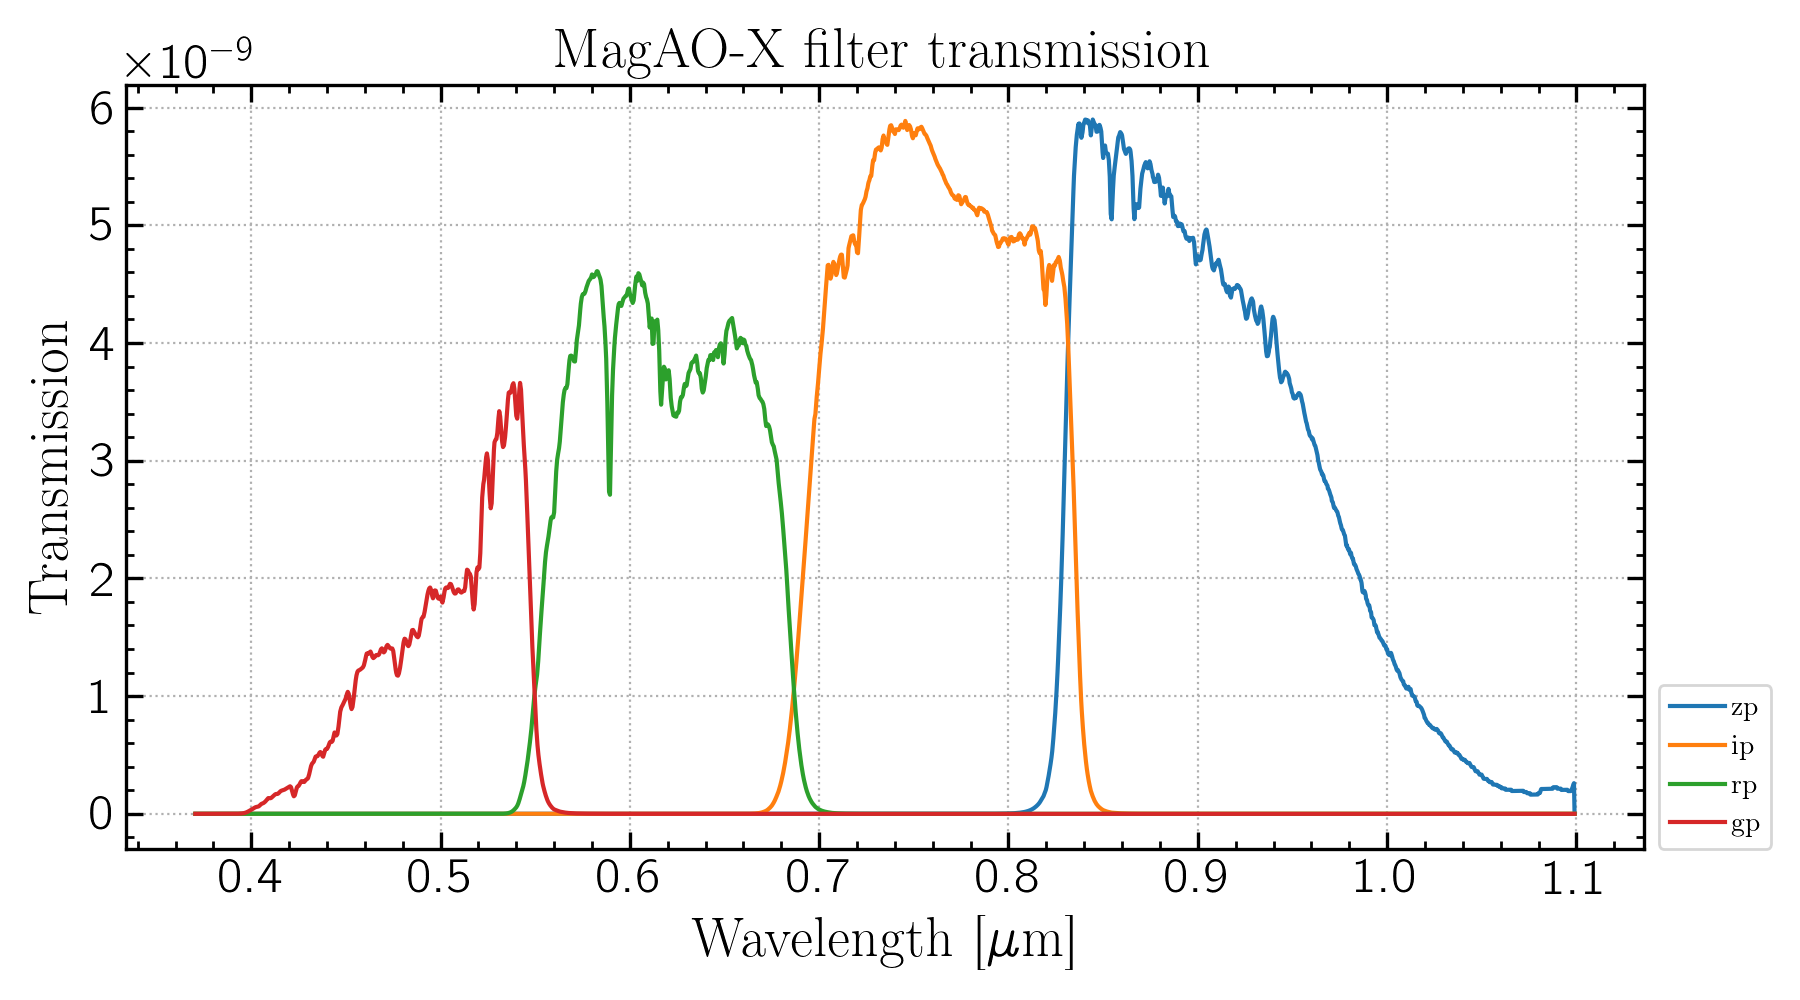

In [6]:
%matplotlib notebook
plt.figure(figsize=(9,5))
plt.plot(zfilter['wavelength [m]']*u.m.to(u.um),
         M0V_resampled_onto_Zfilter_wavelengths*zfilter['normalized transmission'],label='zp')
plt.plot(ifilter['wavelength [m]']*u.m.to(u.um),
         M0V_resampled_onto_Ifilter_wavelengths*ifilter['normalized transmission'],label='ip')
plt.plot(rfilter['wavelength [m]']*u.m.to(u.um),
         M0V_resampled_onto_Rfilter_wavelengths*rfilter['normalized transmission'],label='rp')
plt.plot(gfilter['wavelength [m]']*u.m.to(u.um),
         M0V_resampled_onto_Gfilter_wavelengths*gfilter['normalized transmission'],label='gp')


plt.xlabel('Wavelength [$\mu$m]')
plt.ylabel('Transmission')
plt.title('MagAO-X filter transmission')
plt.legend(loc=(1.01,0))
plt.tight_layout()
plt.grid(ls=":")

## Integrate the flux in each filter by summing model transmission curves above within each filter and multiplying by dlambda (wavelength sample spacing)

In [7]:
# Integrate flux in magaox filters:
dl = np.mean(np.array([M0V_resampled_Zwavelengths[i] - M0V_resampled_Zwavelengths[i-1] 
               for i in range(1,len(M0V_resampled_Zwavelengths))]))
print(dl)

MagAOXZmodel_flux = np.sum(M0V_resampled_onto_Zfilter_wavelengths*zfilter['normalized transmission']*dl)
MagAOXImodel_flux = np.sum(M0V_resampled_onto_Ifilter_wavelengths*ifilter['normalized transmission']*dl)
MagAOXRmodel_flux = np.sum(M0V_resampled_onto_Rfilter_wavelengths*rfilter['normalized transmission']*dl)
MagAOXGmodel_flux = np.sum(M0V_resampled_onto_Gfilter_wavelengths*gfilter['normalized transmission']*dl)
MagAOXGmodel_flux

0.9999999999999999


2.1784149979881116e-06

## Repeat for Sloan filters:

In [8]:
## Repeat for Sloan filters:

# Resample primary model onto filter grid:
from scipy.interpolate import interp1d
# Make interpolation function out of model:
func = interp1d(M0V['wavelength'], M0V['flux'])
# interpolate the model onto the grid of wavelengths from the filter transmission:
M0V_resampled_onto_SDSSZfilter_wavelengths = func(SDSSzfilter['wavelength [um]']*u.um.to(u.AA))
M0V_resampled_SDSSZwavelengths = SDSSzfilter['wavelength [um]']*u.um.to(u.AA)

M0V_resampled_onto_SDSSIfilter_wavelengths = func(SDSSifilter['wavelength [um]']*u.um.to(u.AA))
M0V_resampled_SDSSIwavelengths = SDSSifilter['wavelength [um]']*u.um.to(u.AA)

M0V_resampled_onto_SDSSRfilter_wavelengths = func(SDSSrfilter['wavelength [um]']*u.um.to(u.AA))
M0V_resampled_SDSSRwavelengths = SDSSrfilter['wavelength [um]']*u.um.to(u.AA)

M0V_resampled_onto_SDSSGfilter_wavelengths = func(SDSSgfilter['wavelength [um]']*u.um.to(u.AA))
M0V_resampled_SDSSGwavelengths = SDSSgfilter['wavelength [um]']*u.um.to(u.AA)

# Integrate:
dl = np.mean(np.array([M0V_resampled_SDSSZwavelengths[i] - M0V_resampled_SDSSZwavelengths[i-1] 
               for i in range(1,len(M0V_resampled_SDSSZwavelengths))]))
print(dl)

SDSSZmodel_flux = np.sum(M0V_resampled_onto_SDSSZfilter_wavelengths*SDSSzfilter['normalized transmission']*dl)
SDSSImodel_flux = np.sum(M0V_resampled_onto_SDSSIfilter_wavelengths*SDSSifilter['normalized transmission']*dl)
SDSSRmodel_flux = np.sum(M0V_resampled_onto_SDSSRfilter_wavelengths*SDSSrfilter['normalized transmission']*dl)
SDSSGmodel_flux = np.sum(M0V_resampled_onto_SDSSGfilter_wavelengths*SDSSgfilter['normalized transmission']*dl)
SDSSGmodel_flux

24.999999999999993


2.778245476654951e-06

In [9]:
-2.5*np.log10(SDSSZmodel_flux) - (-2.5*np.log10(MagAOXZmodel_flux)),\
-2.5*np.log10(SDSSImodel_flux) - (-2.5*np.log10(MagAOXImodel_flux)),\
-2.5*np.log10(SDSSRmodel_flux) - (-2.5*np.log10(MagAOXRmodel_flux)),\
-2.5*np.log10(SDSSGmodel_flux) - (-2.5*np.log10(MagAOXGmodel_flux))

(0.14660988257343632,
 0.17172479886137637,
 -0.024847189997910135,
 -0.26407499388080247)

In [10]:
# Get color transformations in magnitudes:

MagAOXtoSDSS_Z = -2.5*np.log10(SDSSZmodel_flux) - (-2.5*np.log10(MagAOXZmodel_flux))
MagAOXtoSDSS_I = -2.5*np.log10(SDSSImodel_flux) - (-2.5*np.log10(MagAOXImodel_flux))
MagAOXtoSDSS_R = -2.5*np.log10(SDSSRmodel_flux) - (-2.5*np.log10(MagAOXRmodel_flux))
MagAOXtoSDSS_G = -2.5*np.log10(SDSSGmodel_flux) - (-2.5*np.log10(MagAOXGmodel_flux))
print(MagAOXtoSDSS_Z,MagAOXtoSDSS_I,MagAOXtoSDSS_R,MagAOXtoSDSS_G)

0.14660988257343632 0.17172479886137637 -0.024847189997910135 -0.26407499388080247


## Convert SDSS published magnitude to MagAOX system:

In [11]:
# SDSS mag to Magao-x mag system:
MagAOXzmag = SDSSzmag - MagAOXtoSDSS_Z
MagAOXimag = SDSSimag - MagAOXtoSDSS_I
MagAOXrmag = SDSSrmag - MagAOXtoSDSS_R
MagAOXgmag = SDSSgmag - MagAOXtoSDSS_G
MagAOXgmag

11.300074993880802

## Compute A and C flux in MagAOX system:

$$ Aflux + Cflux = F_{0,Vega} \times 10^{\frac{-mag_{MagAOXsystem}}{2.5}} $$

$$ Cflux = Aflux \times Contrast_{in\,flux\,units}$$

$$ Aflux + Aflux \times 10^{\frac{-Contrast}{2.5}} = F_{0,Vega} \times 10^{\frac{-mag_{MagAOXsystem}}{2.5}} $$

In [15]:
# Disentangle A and C's flux:
Aflux_MagAOX_z = (1 + 10**(-(-1*zCont/2.5)))**(-1) * 10**(-MagAOXzmag / 2.5)
Aflux_MagAOX_i = (1 + 10**(-(-1*iCont/2.5)))**(-1) * 10**(-MagAOXimag / 2.5)
Aflux_MagAOX_r = (1 + 10**(-(-1*rCont/2.5)))**(-1) * 10**(-MagAOXrmag / 2.5)
Aflux_MagAOX_g = (1 + 10**(-(-1*gCont/2.5)))**(-1) * 10**(-MagAOXgmag / 2.5)

Cflux_MagAOX_z = Aflux_MagAOX_z * 10**(-(-1*zCont/2.5))
Cflux_MagAOX_i = Aflux_MagAOX_i * 10**(-(-1*iCont/2.5))
Cflux_MagAOX_r = Aflux_MagAOX_r * 10**(-(-1*rCont/2.5))
Cflux_MagAOX_g = Aflux_MagAOX_g * 10**(-(-1*gCont/2.5))

# Math check:
Aflux_MagAOX_z+Cflux_MagAOX_z == 10**(-MagAOXzmag / 2.5)
Aflux_MagAOX_z+Cflux_MagAOX_z, 10**(-MagAOXzmag / 2.5)
Aflux_MagAOX_g

3.003386305185623e-05

## Convert A and C flux to magnitudes in MagAOX system:

In [17]:
Amag_MagAOX_z = -2.5*np.log10(Aflux_MagAOX_z)
Amag_MagAOX_i = -2.5*np.log10(Aflux_MagAOX_i)
Amag_MagAOX_r = -2.5*np.log10(Aflux_MagAOX_r)
Amag_MagAOX_g = -2.5*np.log10(Aflux_MagAOX_g)

Cmag_MagAOX_z = -2.5*np.log10(Cflux_MagAOX_z)
Cmag_MagAOX_i = -2.5*np.log10(Cflux_MagAOX_i)
Cmag_MagAOX_r = -2.5*np.log10(Cflux_MagAOX_r)
Cmag_MagAOX_g = -2.5*np.log10(Cflux_MagAOX_g)
Amag_MagAOX_g,Cmag_MagAOX_g

(11.305972009645393, 16.965752245197464)

## Convert to SDSS mags:

In [18]:
Amag_SDSS_z = Amag_MagAOX_z + MagAOXtoSDSS_Z
Amag_SDSS_i = Amag_MagAOX_i + MagAOXtoSDSS_I
Amag_SDSS_r = Amag_MagAOX_r + MagAOXtoSDSS_R
Amag_SDSS_g = Amag_MagAOX_g + MagAOXtoSDSS_G

Cmag_SDSS_z = Cmag_MagAOX_z + MagAOXtoSDSS_Z
Cmag_SDSS_i = Cmag_MagAOX_i + MagAOXtoSDSS_I
Cmag_SDSS_r = Cmag_MagAOX_r + MagAOXtoSDSS_R
Cmag_SDSS_g = Cmag_MagAOX_g + MagAOXtoSDSS_G
Amag_SDSS_g

11.04189701576459

In [15]:
print('SDSS Mags:')
print(Cmag_SDSS_z,Cmag_SDSS_i,Cmag_SDSS_r,Cmag_SDSS_g)
print('MagAOX Mags:')
print(Cmag_MagAOX_z,Cmag_MagAOX_i,Cmag_MagAOX_r,Cmag_MagAOX_g)

SDSS Mags:
14.046595969360888 14.44911314335532 15.61479944955437 16.70167725131666
MagAOX Mags:
13.899986086787452 14.277388344493943 15.63964663955228 16.965752245197464


In [16]:
print('SDSS contrasts:')
print(Amag_SDSS_z - Cmag_SDSS_z, Amag_SDSS_i - Cmag_SDSS_i, Amag_SDSS_r - Cmag_SDSS_r, Amag_SDSS_g - Cmag_SDSS_g)
print('MagAOX contrasts:')
print(zCont,iCont,rCont,gCont)

SDSS contrasts:
-3.4981389336779856 -3.862594266947527 -4.944431657652315 -5.65978023555207
MagAOX contrasts:
-3.4981389336779865 -3.8625942669475255 -4.9444316576523155 -5.659780235552071


In [17]:
print('SDSS g-z color:')
print(Cmag_SDSS_g - Cmag_SDSS_z)
print('MagAOX g-z color:')
print(Cmag_MagAOX_g - Cmag_MagAOX_z)

SDSS g-z color:
2.6550812819557716
MagAOX g-z color:
3.065766158410012


# Repeat with Uncertainties:

In [18]:
from myastrotools.tools import MonteCarloIt
contrasts = pickle.load(open('Magao-X-contrasts-REDO.pkl','rb'))
ContrastArray = np.array([
    MonteCarloIt(contrasts['zCont']), 
    MonteCarloIt(contrasts['iCont']), 
    MonteCarloIt(contrasts['rCont']), 
    MonteCarloIt(contrasts['gCont']), 
    ])
contrasts, ContrastArray

({'zCont': array([-3.49813893,  0.02660085]),
  'iCont': array([-3.86259427,  0.03445049]),
  'rCont': array([-4.94443166,  0.05363381]),
  'gCont': array([-5.65978024,  0.12521444])},
 array([[-3.45625365, -3.49565386, -3.51966399, ..., -3.49764702,
         -3.52068066, -3.48781282],
        [-3.86211407, -3.84995268, -3.81345299, ..., -3.85153309,
         -3.82185871, -3.9055938 ],
        [-4.92228659, -5.01183323, -4.96088263, ..., -4.96969267,
         -4.91493786, -4.98369606],
        [-5.53414833, -5.64369451, -5.6377143 , ..., -5.63949478,
         -5.72461725, -5.77522337]]))

In [19]:
SDSSgmag,SDSSrmag = [11.036,0.013], [10.659,0.013]
SDSSimag,SDSSzmag = [10.556,0.012], [10.506,0.015]# J/ApJ/867/105/refcat2, 2018ApJ...867..105T

SDSSgminusr = MonteCarloIt(SDSSgmag) - MonteCarloIt(SDSSrmag)
print(np.mean(SDSSgminusr),np.std(SDSSgminusr))
SDSSrminusi = MonteCarloIt(SDSSrmag) - MonteCarloIt(SDSSimag)
print(np.mean(SDSSrminusi),np.std(SDSSrminusi))

0.3769639770833295 0.018155305962346196
0.10320825798796696 0.01779912087845856


In [20]:
from myastrotools.tools import MonteCarloIt
# Make Monte Carlo Arrays from Sloan mags:
SloanMagsArray = np.array([
    MonteCarloIt(SDSSzmag), MonteCarloIt(SDSSimag), MonteCarloIt(SDSSrmag), MonteCarloIt(SDSSgmag)
    ])

MagAOXToSloanConversion = np.array([MagAOXtoSDSS_Z,MagAOXtoSDSS_I,MagAOXtoSDSS_R,MagAOXtoSDSS_G])

# Convert to MagAOX mags:
MagAOXMagsArray = np.array([SloanMagsArray[i,:] - MagAOXToSloanConversion[i] for i in range(4)])

In [21]:
# Convert to A and C fluxes:
Aflux_MagAOX = np.array([(1 + 10**(-(-1*ContrastArray[i,:]/2.5)))**(-1) * 10**(-MagAOXMagsArray[i,:] / 2.5) 
                for i in range(4)])


Cflux_MagAOX = np.array([Aflux_MagAOX[i,:] * 10**(-(-1*ContrastArray[i,:]/2.5)) for i in range(4)])
Cflux_MagAOX.shape

(4, 10000)

In [22]:
# Convert flux to mags in MagAOX system:
Amag_MagAOX = np.array([-2.5*np.log10(Aflux_MagAOX[i,:]) for i in range(4)])
Cmag_MagAOX = np.array([-2.5*np.log10(Cflux_MagAOX[i,:]) for i in range(4)])
Amag_MagAOX - Cmag_MagAOX

array([[-3.45625365, -3.49565386, -3.51966399, ..., -3.49764702,
        -3.52068066, -3.48781282],
       [-3.86211407, -3.84995268, -3.81345299, ..., -3.85153309,
        -3.82185871, -3.9055938 ],
       [-4.92228659, -5.01183323, -4.96088263, ..., -4.96969267,
        -4.91493786, -4.98369606],
       [-5.53414833, -5.64369451, -5.6377143 , ..., -5.63949478,
        -5.72461725, -5.77522337]])

In [23]:
# Convert to SDSS mags:
Amag_SDSS_array = np.array([Amag_MagAOX[i,:] + MagAOXToSloanConversion[i] for i in range(4)])
Cmag_SDSS_array = np.array([Cmag_MagAOX[i,:] + MagAOXToSloanConversion[i] for i in range(4)])

Amag_SDSS = np.array([np.mean(Amag_SDSS_array[i]) for i in range(4)])
Cmag_SDSS = np.array([np.mean(Cmag_SDSS_array[i]) for i in range(4)])

e_Amag_SDSS = np.array([np.std(Amag_SDSS_array[i]) for i in range(4)])
e_Cmag_SDSS = np.array([np.std(Cmag_SDSS_array[i]) for i in range(4)])

Cmag_SDSS_dict = {'z':Cmag_SDSS[0],'i':Cmag_SDSS[1],'r':Cmag_SDSS[2],'g':Cmag_SDSS[3]}
e_Cmag_SDSS_dict = {'z':e_Cmag_SDSS[0],'i':e_Cmag_SDSS[1],'r':e_Cmag_SDSS[2],'g':e_Cmag_SDSS[3]}

Amag_SDSS_dict = {'z':Amag_SDSS[0],'i':Amag_SDSS[1],'r':Amag_SDSS[2],'g':Amag_SDSS[3]}
e_Amag_SDSS_dict = {'z':e_Amag_SDSS[0],'i':e_Amag_SDSS[1],'r':e_Amag_SDSS[2],'g':e_Amag_SDSS[3]}

print(Amag_SDSS)
print(e_Amag_SDSS)
print()
print(Cmag_SDSS)
print(e_Cmag_SDSS)

[10.54844838 10.58656028 10.67024522 11.04192713]
[0.01505106 0.01210838 0.01308748 0.01324556]

[14.04645663 14.44934452 15.61383323 16.70157432]
[0.02962585 0.03575005 0.05481896 0.12428476]


In [25]:
#pickle.dump([Amag_SDSS_dict,e_Amag_SDSS_dict,Cmag_SDSS_dict,e_Cmag_SDSS_dict])
pickle.dump([Amag_SDSS,e_Amag_SDSS,Cmag_SDSS,e_Cmag_SDSS], open('SDSS-magnitudes-noatm.pkl','wb'))